# Modul 9 Persamaan Diferensial Numerik: PDP orde 1, persamaan transport/adveksi

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

Ini adalah pertemuan terakhir praktikum Persamaan Diferensial Numerik tahun ini.

Di pertemuan kali ini, kita akan membahas penyelesaian secara numerik untuk PDP orde 1, lebih tepatnya "persamaan transport" atau juga disebut persamaan adveksi. (Selain itu, semua PDP orde 1 tergolong hiperbolik.)

Persamaan transport adalah salah satu bentuk PDP paling sederhana. Persamaan transport bisa dituliskan sebagai berikut:

$$u_t + du_x = 0, \quad (x,t) \in [0, L] \times [0, T],$$
$$u(x,0) = f(x), \quad 0 \le x \le L.$$

Untuk kebutuhan praktikum, bentuk umum persamaan transport bisa ditulis:

$$u_t + du_x = 0, \quad \text{xb} < x < \text{xu}, \quad \text{tb} < t < \text{tu}$$

$$u(x,\text{tb}) = f(x), \quad \text{xb} \le x \le \text{xu}$$

$$u(\text{xb},t) = \text{lb}(t), \quad \text{tb} < t < \text{tu}$$

$$u(\text{xu},t) = \text{rb}(t), \quad \text{tb} < t < \text{tu}$$

Solusi eksak dari persamaan transport bisa ditulis $u(x,t) = f(x-dt)$ (catatan: $dt$ di sini adalah nilai $d$ dikali variabel $t$, bukan diferensial). Interval $x$ dan $t$ dipartisi dengan *step size* $h = \Delta x$ dan $k = \Delta t$ berturut-turut sehingga diperoleh 
$$x_j = (j-1) \Delta x, \quad j = 1, 2, \dots, N_x = m$$
$$t_n = (n-1) \Delta t, \quad n = 1, 2, \dots, N_t = N$$
Dari sini diperoleh suau *grid* dengan titik-titik $(x_j, t_n)$. Untuk nilai hampiran di titik-titik grid tersebut, bisa digunakan notasi $u_j^n \equiv u(x_j, t_n)$ ataupun $w_{j,n} \equiv u(x_j, t_n)$.

Berikut beberapa metode untuk mengaproksimasi persamaan transport:

* Metode Courant-Isaacson-Rees (FTBS, upwind)

* Metode Richardson (FTCS)

* Metode Lax

## Metode Courant-Isaacson-Rees

Metode ini adalah metode FTBS *(Forward Time Backward Space)* yang juga dikenal dengan metode *upwind* dengan akurasi $O(\Delta t, \Delta x)$. Metode ini memiliki persamaan beda hingga
$$\frac{u_{j}^{n+1} - u_j^n}{\Delta t} + d\frac{u_j^n - u_{j-1}^n}{\Delta x} = 0$$

Jika dituliskan dalam *term* $u_j^{n+1}$, yaitu dalam bentuk $u_j^{n+1} = \dots$ maka bentuknya menjadi
$$u_j^{n+1} = (1-C)u_j^n + Cu_{j-1}^n, \quad C \equiv \frac{d\Delta t}{\Delta x}$$
Metode ini membutuhkan syarat batas kiri.

### *Function file*

Berikut kode algoritma metode Courant-Isaacson-Rees menggunakan Octave.

In [31]:
function [x, t, u] = courant_i_r(d, f, lb, xb, xu, tb, tu, dx, dt)
  x = xb : dx : xu;
  t = tb : dt : tu;
  nx = length(x);
  nt = length(t);
  u = zeros(nx, nt);

  for j = 1 : nx
    u(j, 1) = f(x(j));
  endfor

  for n = 1 : nt
    u(1, n) = lb(t(n));
  endfor

  C = d * dt / dx;
  for n = 1 : (nt - 1)
    for j = 2 : nx
      u(j, n+1) = (1-C) * u(j, n) + C * u(j-1, n);
    endfor
  endfor
endfunction

### Contoh penggunaan

Misal diberikan soal berikut:

$$u_t + u_x = 0, \quad 0 \le x \le 1, \quad 0 \le t \le 1$$
$$u(x,0) = \sin(8 \pi x), \quad 0 \le x \le 1$$
$$u(0,t) = \sin(-8 \pi t), \quad u(1,t) = \sin(-8 \pi (1-t)), \quad 0 \le t \le 1$$
$$\Delta x = 0.025, \quad \Delta t = 0.02$$

Perhatikan bahwa $d=1$.

Dalam membandingkan dengan solusi eksak, sulit jika kita menumpuk plot seperti biasa. Kita akan menggunakan *syntax* `figure(n)` pada Octave untuk membuat lebih dari satu jendela plot untuk kebutuhannya masing-masing. Variabel `sol` akan digunakan untuk menyimpan solusi eksak dari persamaan transport.

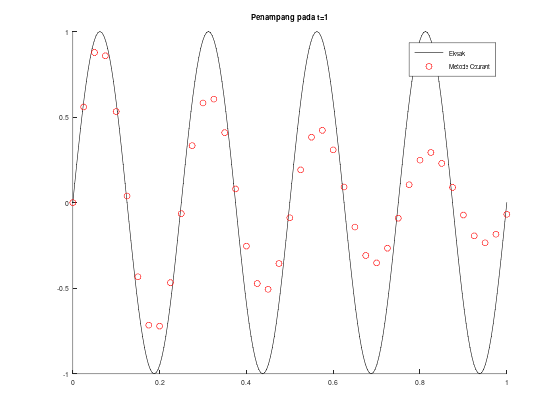

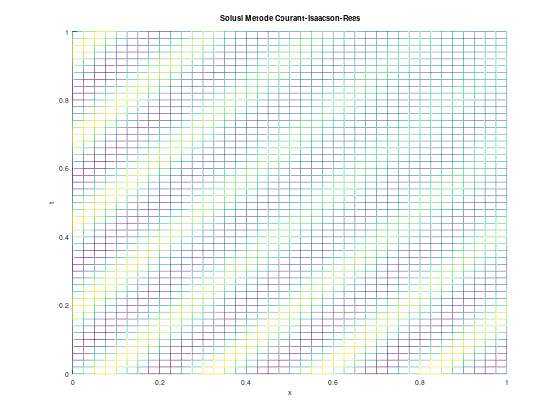

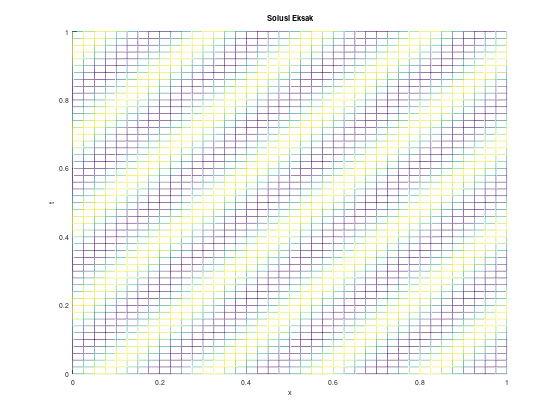

In [34]:
d = 1;
f = @(x) sin(8*pi*x);
lb = @(t) sin(-8*pi*t);
xb = 0;
xu = 1;
tb = 0;
tu = 1;
dx = 0.025;
dt = 0.02;

[x, t, u] = courant_i_r(d, f, lb, xb, xu, tb, tu, dx, dt);

sln = @(x,t) sin(8*pi*(x-t));

for j = 1 : length(x)
  for n = 1 : length(t)
    y(j, n) = sln(x(j), t(n));
  endfor
endfor

figure(1);
hold on;
mesh(x, t, u');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Metode Courant-Isaacson-Rees");

figure(2);
hold on;
mesh(x, t, y');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Eksak")

% solusi eksak pada t=1
u1 = @(x) sln(x, 1);

figure(3);
hold on;
fplot(u1, [0, 1], 'k');
scatter(x, u(:, length(t)), 'r');
legend("Eksak", "Metode Courant");
title("Penampang pada t=1");

Coba putar-putar grafiknya :)

## Metode Richardson (FTCS)

Metode ini adalah metode FTCS (Forward Time Center Space) dengan akurasi $O(\Delta t, \Delta x^2)$. Metode ini memiliki persamaan beda hingga

$$\frac{u_j^{n+1} - u_j^n}{\Delta t} + d\frac{u_{j+1}^n - u_{j-1}^n}{2 \Delta x} = 0$$

Jika dituliskan dalam *term* $u_j^{n+1}$ menjadi

$$u_j^{n+1} = u_j^n + C(u_{j+1}^n - u_{j-1}^n), \quad C \equiv \frac{d \Delta t}{2\Delta x}$$

Metode ini membutuhkan syarat batas kiri dan kanan.

Perlu dicatat, metode ini tidak stabil; hasilnya kemungkinan akan jelek.

### *Function file*

Berikut kode algoritma metode Richardson menggunakan Octave.

In [23]:
function [x, t, u] = richardson(d, f, lb, rb, xb, xu, tb, tu, dx, dt)
  x = xb : dx : xu;
  t = tb : dt : tu;
  nx = length(x);
  nt = length(t);
  u = zeros(nx, nt);

  for j = 1 : nx
    u(j, 1) = f(x(j));
  endfor

  for n = 1 : nt
    u(1, n) = lb(t(n));
    u(nx, n) = rb(t(n));
  endfor

  C = (d * dt) / (2 * dx);
  for n = 1 : (nt - 1)
    for j = 2 : (nx - 1)
      u(j, n+1) = u(j, n) - C * (u(j+1, n) - u(j-1, n));
    endfor
  endfor
endfunction

### Contoh penggunaan

Dengan soal yang sama,

$$u_t + u_x = 0, \quad 0 \le x \le 1, \quad 0 \le t \le 1$$
$$u(x,0) = \sin(8 \pi x), \quad 0 \le x \le 1$$
$$u(0,t) = \sin(-8 \pi t), \quad u(1,t) = \sin(-8 \pi (1-t)), \quad 0 \le t \le 1$$
$$\Delta x = 0.025, \quad \Delta t = 0.02$$

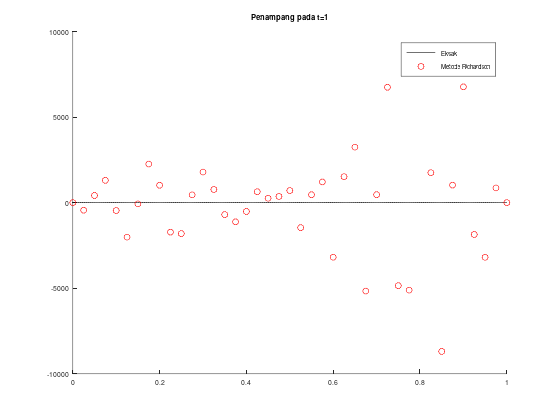

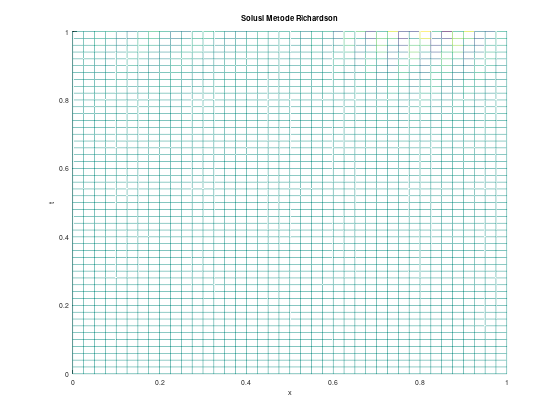

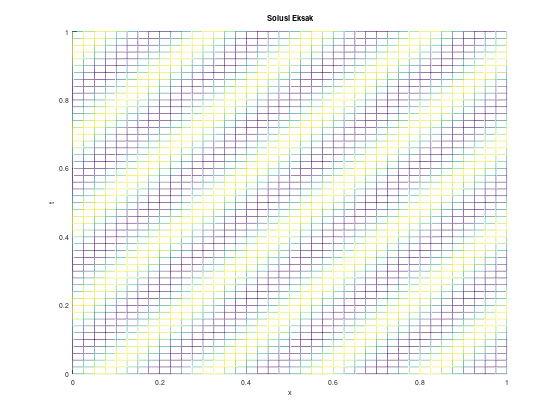

In [36]:
d = 1;
f = @(x) sin(8*pi*x);
lb = @(t) sin(-8*pi*t);
rb = @(t) sin(-8*pi*(1-t));
xb = 0;
xu = 1;
tb = 0;
tu = 1;
dx = 0.025;
dt = 0.02;

[x, t, u] = richardson(d, f, lb, rb, xb, xu, tb, tu, dx, dt);

sln = @(x,t) sin(8*pi*(x-t));

for j = 1 : length(x)
  for n = 1 : length(t)
    y(j, n) = sln(x(j), t(n));
  endfor
endfor

figure(1);
hold on;
mesh(x, t, u');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Metode Richardson");

figure(2);
hold on;
mesh(x, t, y');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Eksak")

% solusi eksak pada t=1
u1 = @(x) sln(x, 1);

figure(3);
hold on;
fplot(u1, [0, 1], 'k');
scatter(x, u(:, length(t)), 'r');
legend("Eksak", "Metode Richardson");
title("Penampang pada t=1");

Jika diperhatikan, terlihat bahwa nilai u(x, 0) di figure 1 adalah 0, sehingga kalian mungkin akan mengira bahwa metodenya salah atau typo. Namun perhatikan sumbu u pada figure 1 dan 3. Nilainya mempunyai range yang berkisar [−10000, 10000]. Hal ini menunjukkan bahwa solusi metode Richardson akan tidak stabil. Pada faktanya, untuk persamaan transport, metode ini selalu tidak stabil. Kita dapat membatasi range dengan menambahkan zlim([-1, 1]); dan ylim([-1, 1]); berturut-turut pada figure(1); dan figure(3);.

## Metode Lax

Metode ini adalah perbaikan dari metode Richardson, mengganti $u_j^n$ dengan $\frac{1}{2} (u_{j+1}^n + u_{j-1}^n)$, sehingga persamaan bedanya menjadi

$$u_j^{n+1} = \frac{1}{2} (u_{j+1}^n + u_{j-1}^n) + C(u_{j+1}^n - u_{j-1}^n), \quad C \equiv \frac{d \Delta t}{2 \Delta x}$$

Metode ini membutuhkan syarat batas kiri dan kanan.

### *Function file*

Berikut kode algoritma metode Lax menggunakan Octave.

In [29]:
function [x, t, u] = lax(d, f, lb, rb, xb, xu, tb, tu, dx, dt)
  x = xb : dx : xu;
  t = tb : dt : tu;
  nx = length(x);
  nt = length(t);
  u = zeros(nx, nt);

  for j = 1 : nx
    u(j, 1) = f(x(j));
  endfor

  for n = 1 : nt
    u(1, n) = lb(t(n));
    u(nx, n) = rb(t(n));
  endfor
  
  C = (d * dt) / (2 * dx);
  for n = 1 : (nt - 1)
    for j = 2 : (nx - 1)
      u(j, n+1) = (u(j+1, n) + u(j-1, n)) / 2 - C * (u(j+1, n) - u(j-1, n));
    endfor
  endfor
endfunction

### Contoh penggunaan

Dengan soal yang sama,

$$u_t + u_x = 0, \quad 0 \le x \le 1, \quad 0 \le t \le 1$$
$$u(x,0) = \sin(8 \pi x), \quad 0 \le x \le 1$$
$$u(0,t) = \sin(-8 \pi t), \quad u(1,t) = \sin(-8 \pi (1-t)), \quad 0 \le t \le 1$$
$$\Delta x = 0.025, \quad \Delta t = 0.02$$

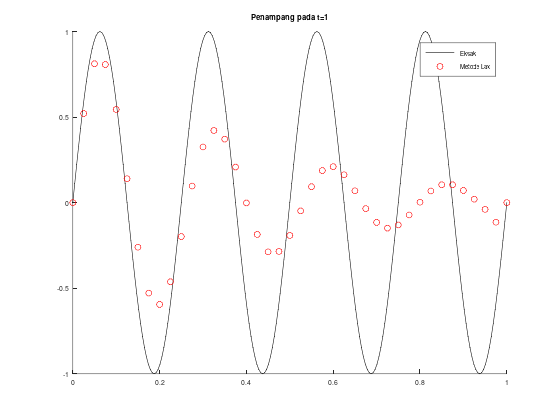

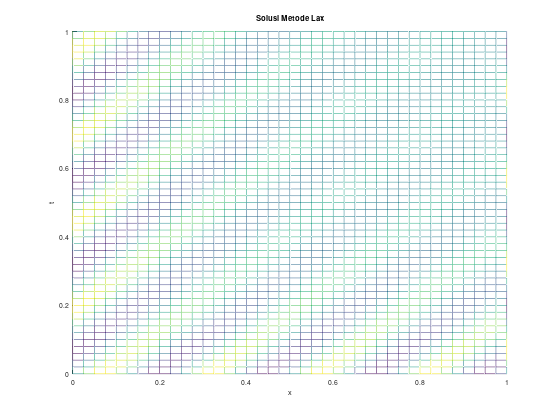

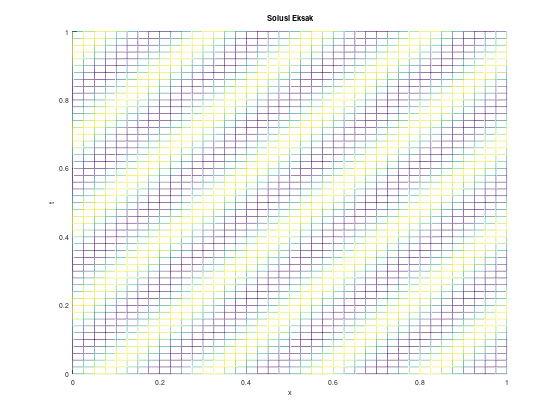

In [38]:
d = 1;
f = @(x) sin(8*pi*x);
lb = @(t) sin(-8*pi*t);
rb = @(t) sin(-8*pi*(1-t));
xb = 0;
xu = 1;
tb = 0;
tu = 1;
dx = 0.025;
dt = 0.02;

[x, t, u] = lax(d, f, lb, rb, xb, xu, tb, tu, dx, dt);

sln = @(x,t) sin(8*pi*(x-t));

for j = 1 : length(x)
  for n = 1 : length(t)
    y(j, n) = sln(x(j), t(n));
  endfor
endfor

figure(1);
hold on;
mesh(x, t, u');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Metode Lax");

figure(2);
hold on;
mesh(x, t, y');
xlabel('x');
ylabel('t');
zlabel('u');
title("Solusi Eksak");

% solusi eksak pada t=1
u1 = @(x) sln(x, 1);

figure(3);
hold on;
fplot(u1, [0, 1], 'k');
scatter(x, u(:, length(t)), 'r');
legend("Eksak", "Metode Lax");
title("Penampang pada t=1");